In [1]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import numpy as np
from rasterio.plot import reshape_as_raster, reshape_as_image
import pandas as pd
import matplotlib.pyplot as plt
from rasterio.plot import show

## Loading Data

In [2]:
nm_shp = gpd.read_file("JamaicaNonmangroveLabels.shp")
m_shp = gpd.read_file("JamaicaMangroveLabelsFixed.shp")

nm_geoms = nm_shp.geometry
m_geoms = m_shp.geometry

In [3]:
src = rasterio.open("JamaicaFeaturesNoSAR.tif") 
mask_src = rasterio.open("JamaicaImageMask.tif") 
m_image, m_transform = mask(src, m_geoms, crop=True) 
nm_image, nm_transform = mask(src, nm_geoms, crop=True)

#Getting mask for each class
mmask, mmask_transform = mask(mask_src, m_geoms, crop=True)
nmmask, nmmask_transform = mask(mask_src, nm_geoms, crop=True)

# Downsampling

In [4]:
from scipy import ndimage
import matplotlib.pyplot as plt

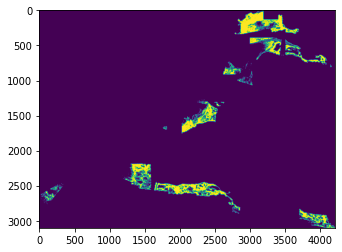

<AxesSubplot:>

In [5]:
show(mmask)

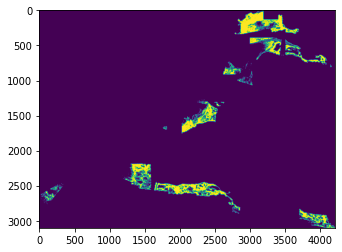

<AxesSubplot:>

In [6]:
show(mmask[0])

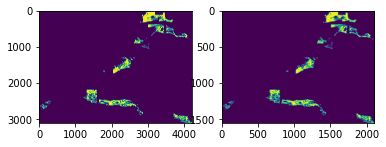

In [7]:
#mmask downsampling
fig = plt.figure()
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
mmask_result = ndimage.zoom(mmask[0], 0.5, order=1) #order = 1 means bilinear interpolation
ax1.imshow(mmask[0])
ax2.imshow(mmask_result)
plt.show()

In [8]:
mmask.shape

(1, 3101, 4213)

In [9]:
new_mmask_result = np.array([mmask_result])
new_mmask_result.shape

(1, 1550, 2106)

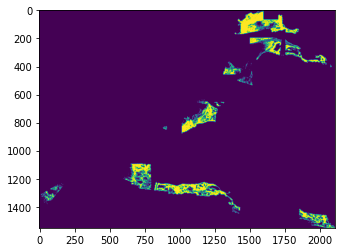

<AxesSubplot:>

In [10]:
show(new_mmask_result) #this is the mmask after downsampling

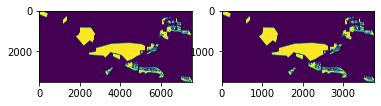

In [11]:
#nmmask downsampling
fig = plt.figure()
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
nmmask_result = ndimage.zoom(nmmask[0], 0.5, order=1)
ax1.imshow(nmmask[0])
ax2.imshow(nmmask_result)
plt.show()

In [12]:
new_nmmask_result = np.array([nmmask_result]) #this is the nmmask after downsampling

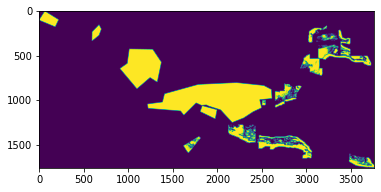

<AxesSubplot:>

In [17]:
show(new_nmmask_result)

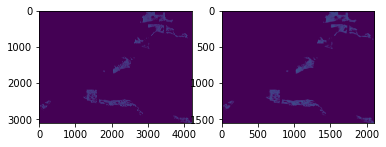

In [13]:
#m_image downsampling
fig = plt.figure()
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
m_image_result = ndimage.zoom(m_image[0], 0.5, order=1)
ax1.imshow(m_image[0])
ax2.imshow(m_image_result)
plt.show()

In [14]:
new_m_image_result = np.array([m_image_result]) #this is the m_image after downsampling

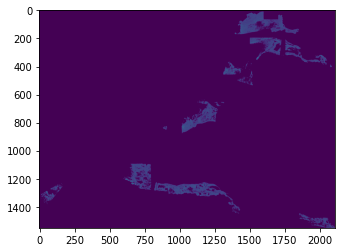

<AxesSubplot:>

In [18]:
show(new_m_image_result)

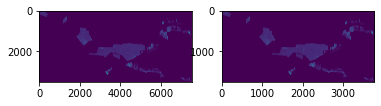

In [15]:
#nm_image downsampling
fig = plt.figure()
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
nm_image_result = ndimage.zoom(nm_image[0], 0.5, order=1)
ax1.imshow(nm_image[0])
ax2.imshow(nm_image_result)
plt.show()

In [16]:
new_nm_image_result = np.array([nm_image_result]) #this is the nm_image after downsampling

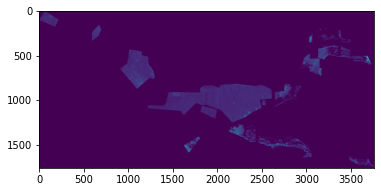

<AxesSubplot:>

In [19]:
show(new_nm_image_result)

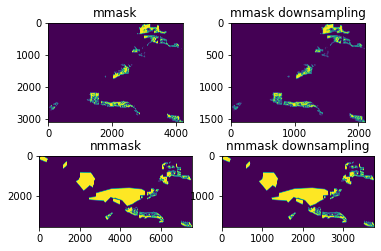

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(221)  
ax2 = fig.add_subplot(222) 
ax3 = fig.add_subplot(223)  
ax4 = fig.add_subplot(224) 
ax1.imshow(mmask[0])
ax2.imshow(new_mmask_result[0])
ax3.imshow(nmmask[0])
ax4.imshow(new_nmmask_result[0])
ax1.title.set_text('mmask')
ax2.title.set_text('mmask downsampling')
ax3.title.set_text('nmmask')
ax4.title.set_text('nmmask downsampling');

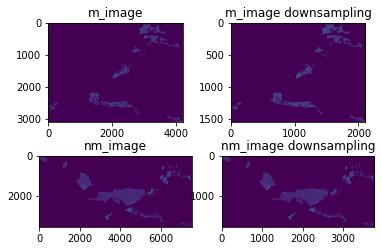

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(221)  
ax2 = fig.add_subplot(222) 
ax3 = fig.add_subplot(223)  
ax4 = fig.add_subplot(224) 
ax1.imshow(m_image[0])
ax2.imshow(new_m_image_result[0])
ax3.imshow(nm_image[0])
ax4.imshow(new_nm_image_result[0])
ax1.title.set_text('m_image')
ax2.title.set_text('m_image downsampling')
ax3.title.set_text('nm_image')
ax4.title.set_text('nm_image downsampling');